# Q1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return x**4 - 6*x**2 + 4*x + 18

def df(x):
    return 4*x**3 - 12*x + 4

## (3)

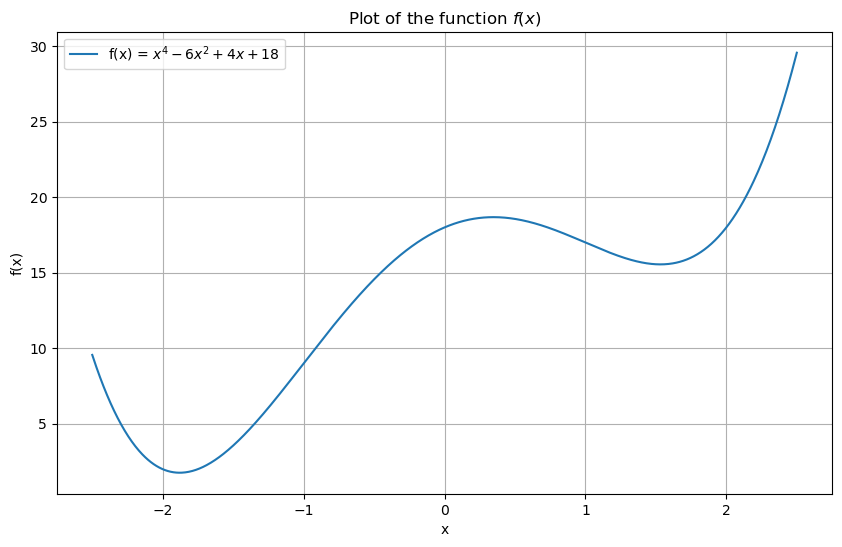

Approximate global minimum at x = -1.88, f(x) = 1.77


In [4]:
#画图用来分割x的方法
x = np.linspace(-2.5, 2.5, 1000)
y = f(x)

# Plotting the function
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='f(x) = $x^4 - 6x^2 + 4x + 18$')
plt.title('Plot of the function $f(x)$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()

# 使用np.argmin(y)找到数组y中最小值的索引
minima_x = x[np.argmin(y)]
# 找到数组y中的最小值
minima_y = np.min(y)


print(f"Approximate global minimum at x = {minima_x:.2f}, f(x) = {minima_y:.2f}")

I can see two local minimas and one global minima in[-2.5,2.5].The local minimas are x=-1.88 f(x)=1.77 and x=1.5 f(x)=15, in which x=-1.88 is also the global minima from [-2.5,2.5]. There might be other minimas beyond this range.

## (4)

In [5]:
# 定义梯度下降函数，接收初始x值、学习率和迭代步数作为参数
def gradient_descent(initial_x, learning_rate, steps):
    # 将初始x值赋给x
    x = initial_x
    # 初始化一个列表，用于存储每一步的x值
    x_values = [x]
    # 进行指定次数的迭代
    for _ in range(steps):
        # 更新x值，x = x - 学习率 * x点的导数
        x = x - learning_rate * df(x)
        # 将新的x值添加到列表中
        x_values.append(x)
    # 返回迭代过程中的所有x值
    return x_values


## (5)

In [6]:
# Gradient descent parameters
initial_points = [1, 0]  # Starting points
learning_rates = [0.1, 0.01]  # Learning rates
steps = 20  # Number of steps

for initial_x in initial_points:
    for alpha in learning_rates:
        x_values = gradient_descent(initial_x, alpha, steps)
        final_x = x_values[-1]
        print(f"Starting from x={initial_x}, with alpha={alpha}, final x after {steps} steps: {final_x}")

# This script will output the final x values for each combination of starting point and learning rate.


Starting from x=1, with alpha=0.1, final x after 20 steps: 1.5320978040292623
Starting from x=1, with alpha=0.01, final x after 20 steps: 1.4929314867366945
Starting from x=0, with alpha=0.1, final x after 20 steps: -2.380554142228462
Starting from x=0, with alpha=0.01, final x after 20 steps: -1.6989180105534625


I observe convergence in both cases. When we set x0=1, it converges to the larger loacl minima. While,x0=0 will converge to the smaller local minima. These results indicate convergence to different points depending on the initial starting value, suggesting the presence of multiple local minima.



## (6)

Comparing these results with those obtained using a higher learning rate (alpha=0.1), we observe that with a lower learning rate, the convergence is slower and the final values are closer to the initial points. This is expected as a lower learning rate makes smaller adjustments to x at each step, leading to a more gradual approach towards a minimum.

# Q2

## (1)

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('College.csv')

#一种得到dummy的方法

# 使用get_dummies方法将分类变量转换为虚拟/指示变量
# 参数drop_first=True表示减少一个冗余类别，避免多重共线性
df = pd.get_dummies(df, drop_first=True)

# 使用train_test_split函数将数据集分割为训练集和测试集
# test_size=177指定测试集大小为177，random_state=66用于确保每次分割都是相同的
train_set, test_set = train_test_split(df, test_size=177, random_state=66)


In [5]:
df.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_Yes
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,True
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,True
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,True
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,True
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,True


## (2)

Fit the OLS regression on the training set, and report the test error obtained

In [6]:
#用OLS拟合模型，并且在测试集合上检验MSE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train = train_set.drop('Apps', axis=1)
y_train = train_set['Apps']
X_test = test_set.drop('Apps', axis=1)
y_test = test_set['Apps']

ols_model = LinearRegression()
ols_model.fit(X_train, y_train)

y_pred_ols = ols_model.predict(X_test)
test_error_ols = mean_squared_error(y_test, y_pred_ols)
print("Test Error for OLS: ", test_error_ols)

Test Error for OLS:  917877.5920878714


## (3)

# LASSO

Fit the LASSO regression on the training set, with the penalization parameter chosen by
20-fold cross-validation. Report the test error obtained

In [7]:
#拉索一定要先标准化，只用对X_train,X_test
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#train用fit_transform
X_train_scaled = scaler.fit_transform(X_train)
#test用transform
X_test_scaled = scaler.transform(X_test)

In [9]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
import numpy as np

# 初始化LassoCV模型，设置alpha的范围从0.01到60，总共1000个值，交叉验证折数为20
lasso_model = LassoCV(alphas=np.linspace(0.01, 60, 1000), cv=20)
# 使用训练数据对模型进行拟合，X_train_scaled是经过缩放的训练数据特征，y_train是训练数据的目标值
lasso_model.fit(X_train_scaled, y_train)

# 使用拟合好的模型对测试数据特征X_test_scaled进行预测，得到预测值y_pred_lasso
y_pred_lasso = lasso_model.predict(X_test_scaled)
# 计算模型预测值与实际测试数据目标值y_test之间的均方误差，作为测试误差
test_error_lasso = mean_squared_error(y_test, y_pred_lasso)

# 打印LASSO模型的测试误差
print("Test Error for LASSO: ", test_error_lasso)
# 打印模型选择的最佳alpha值
print("Best alpha for LASSO: ", lasso_model.alpha_)


Test Error for LASSO:  891017.0361910227
Best alpha for LASSO:  15.923263263263264


## (4)

# RIDGE

In [14]:
from sklearn.linear_model import RidgeCV

#如果不指定 cv 参数，它将使用留一交叉验证（Leave-One-Out CV）
ridge_model = RidgeCV(alphas=np.linspace(0.01, 60, 1000), cv=None)  
ridge_model.fit(X_train_scaled, y_train)

y_pred_ridge = ridge_model.predict(X_test_scaled)
test_error_ridge = mean_squared_error(y_test, y_pred_ridge)

print("Test Error for Ridge: ", test_error_ridge)
# 获取并打印最佳alpha值
print("Best alpha for Ridge: ", ridge_model.alpha_)

Test Error for Ridge:  917796.6388118648
Best alpha for Ridge:  0.01


## (5)

In [11]:
print(f"Test Error OLS: {test_error_ols}")
print(f"Test Error LASSO: {test_error_lasso}")
print(f"Test Error Ridge: {test_error_ridge}")

Test Error OLS: 917877.5920878714
Test Error LASSO: 891017.0361910227
Test Error Ridge: 917796.6388118648


Based on the provided test errors for the Ordinary Least Squares (OLS), LASSO, and Ridge regression models, the LASSO model has the lowest test error, which suggests that it might be the best model among the three for this particular dataset.

The difference between the test errors of the OLS and Ridge models is very small, indicating that both models perform similarly on the test set. However, the LASSO model shows a slightly better performance with a lower test error.

### I would prefer LASSO model since its accuracy and interpretability.